# Movies Industry

Categorical:
1. top directors/genre/writers by frequency
2. top production companies by frequency

Quantitative: none

Relationships
1. company and gross 
2. genre and run time 
3. genre and gross
4. genre and score
5. director and score
6. star and gross

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [21]:
movies = pd.read_csv('movies.csv',header=0)
movies['year'] = pd.to_datetime(movies['year'],format="%Y").dt.to_period('Y')
movies.columns

Index(['budget', 'company', 'country', 'director', 'genre', 'gross', 'name',
       'rating', 'released', 'runtime', 'score', 'star', 'votes', 'writer',
       'year'],
      dtype='object')

In [113]:
# average runtime by genre
t = movies[['genre','runtime']].groupby('genre')
g = t.agg(np.mean)
g.sort_values(by='runtime',ascending=False)

,runtime
genre,
Biography,117.944290
Musical,115.250000
Drama,111.921745
Crime,111.118774
Adventure,109.400510
Action,109.000751
Mystery,107.789474
War,104.000000
Sci-Fi,102.769231


In [108]:
# average score by genre
s = movies[['genre','score']].groupby('genre').agg(np.mean)
s.sort_values(by='score',ascending=False)

,score
genre,
Biography,7.040390
Crime,6.756322
Animation,6.746931
Drama,6.715720
Musical,6.650000
War,6.400000
Adventure,6.354847
Mystery,6.342105
Sci-Fi,6.253846


In [114]:
# runtime with histogram, though this is not meaningful data since there are a lot of single occurences
#plt.figure(figsize=(10,4))
#plt.hist(t.runtime,bins=20,width=10)
#plt.show()

<BarContainer object of 15 artists>

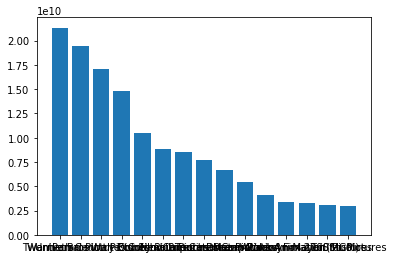

In [122]:
# total gross by company
c = movies[['company','gross']].groupby('company').agg(np.sum).sort_values(by='gross',ascending=False)

plt.figure()
plt.bar(c[0:15].index, c[0:15].gross)

In [124]:
gg = movies[['genre','gross']].groupby('genre').agg(np.mean).sort_values(by='gross',ascending=False)
gg

,gross
genre,
Animation,9.148810e+07
Action,5.619281e+07
Adventure,5.330381e+07
Mystery,3.631451e+07
Comedy,2.574203e+07
Horror,2.569620e+07
Biography,2.400425e+07
Sci-Fi,2.367705e+07
Fantasy,2.014541e+07


In [130]:
ds = movies[['director','score']].groupby('director').agg([np.size,np.mean]).sort_values(by=('score','size'),ascending=False)
ds.head(20)

score          
                   size      mean
director                         
Woody Allen        33.0  6.993939
Clint Eastwood     24.0  7.154167
Steven Soderbergh  21.0  6.666667
Steven Spielberg   21.0  7.385714
Ron Howard         20.0  6.840000
Ridley Scott       19.0  6.915789
Joel Schumacher    19.0  6.373684
Barry Levinson     18.0  6.350000
Spike Lee          18.0  6.555556
Richard Linklater  17.0  7.147059
Stephen Frears     17.0  6.764706
Oliver Stone       17.0  6.929412
Tim Burton         17.0  7.070588
Bruce Beresford    16.0  6.393750
Martin Scorsese    15.0  7.620000
Rob Reiner         15.0  6.806667
Chris Columbus     15.0  6.500000
Renny Harlin       15.0  5.660000
Garry Marshall     15.0  6.013333
Tony Scott         15.0  6.786667

In [132]:
sg = movies[['star','gross']].groupby('star').agg(np.sum).sort_values(by='gross',ascending=False)
sg.head(20)

,gross
star,
Tom Hanks,3973405978
Tom Cruise,3117511013
Robert Downey Jr.,2708959285
Will Smith,2657757165
Johnny Depp,2512278393
Adam Sandler,2489442790
Daniel Radcliffe,2454695640
Ben Stiller,2435871141
Leonardo DiCaprio,2304908971


In [135]:
movies.genre.value_counts()

Comedy       2080
Drama        1444
Action       1331
Crime         522
Adventure     392
Biography     359
Horror        277
Animation     277
Mystery        38
Fantasy        32
Thriller       18
Romance        15
Family         14
Sci-Fi         13
Musical         4
War             2
Western         2
Name: genre, dtype: int64

In [136]:
movies.rating.value_counts()

R                3392
PG-13            1995
PG                951
NOT RATED         174
G                 147
UNRATED            71
Not specified      63
NC-17              22
TV-MA               1
TV-14               1
TV-PG               1
B15                 1
B                   1
Name: rating, dtype: int64